<center> <img src = https://raw.githubusercontent.com/AndreyRysistov/DatasetsForPandas/main/hh%20label.jpg alt="drawing" style="width:400px;">

# <center> Проект: Анализ вакансий из HeadHunter
   

In [1]:
import pandas as pd
import psycopg2

In [2]:
# Чтобы избежать отображение предупреждений об использовании sqlalchemy 
import warnings
warnings.filterwarnings("ignore")

In [4]:
# теперь можно обратиться к этим данным, без явного объявления их в коду.

import os
from dotenv import load_dotenv

load_dotenv()
DBNAME = os.getenv("DBNAME")
USER = os.getenv("USER")
PASSWORD = os.getenv("PASSWORD")
HOST = os.getenv("HOST")
PORT = os.getenv("PORT")

ModuleNotFoundError: No module named 'dotenv'

In [ ]:
connection = psycopg2.connect(
    dbname=DBNAME,
    user=USER,
    host=HOST,
    password=PASSWORD,
    port=PORT
)

# Юнит 3. Предварительный анализ данных

1. Напишите запрос, который посчитает количество вакансий в нашей базе (вакансии находятся в таблице vacancies). 

In [ ]:
# текст запроса
query_3_1 = f'''select 
                count(id)
                from vacancies
 '''

In [ ]:
# результат запроса
df = pd.read_sql_query(query_3_1, connection)
df

,count
0,49197


In [ ]:
# Это не ошибка и не требование, просто хочу показать пример использования f-string
print(f'Число уникальных id вакансий: {df.squeeze()}')

Число уникальных id вакансий: 49197


2. Напишите запрос, который посчитает количество работодателей (таблица employers). 

In [ ]:
# текст запроса
query_3_2 = f'''select 
                count(id)
                from employers
 '''

In [ ]:
# результат запроса
df = pd.read_sql_query(query_3_2, connection)
df

,count
0,23501


3. Посчитате с помощью запроса количество регионов (таблица areas).

In [ ]:
# текст запроса
query_3_3 = f'''select 
                count(id)
                from areas
 '''

In [ ]:
# результат запроса
df = pd.read_sql_query(query_3_3, connection)
df

,count
0,1362


4. Посчитате с помощью запроса количество сфер деятельности в базе (таблица industries).

In [ ]:
# текст запроса
query_3_4 = f'''select 
                count(id)
                from industries
 '''

In [ ]:
# результат запроса
df = pd.read_sql_query(query_3_4, connection)
df

,count
0,294


***

In [ ]:
# выводы по предварительному анализу данных

Спрос на рынке труда вдвое больше предложения

На каждую сферу деятельности в среднем приходится 167 специалистов и 83 работодателя

---
Перед тем, как строить гипотезы, неплохо бы познакомить читателя с фактами на которых эти гипотезы построены,что-то вроде:

В представленной БД содержится информвация:
- 49197 вакансиях;
- 23501 работодателе;
- 1362 регионе;
- 294 сфере деятельности.

# Юнит 4. Детальный анализ вакансий

1. Напишите запрос, который позволит узнать, сколько (cnt) вакансий в каждом регионе (area).
Отсортируйте по количеству вакансий в порядке убывания.

In [ ]:
# текст запроса
query_4_1 = f'''select 
                count(v.area_id),
                a.name
                from areas a
                join vacancies v on a.id=v.area_id
                group by 2
                order by 1 desc
 '''

In [ ]:
# результат запроса
df = pd.read_sql_query(query_4_1, connection)
df

,count,name
0,5333,Москва
1,2851,Санкт-Петербург
2,2112,Минск
3,2006,Новосибирск
4,1892,Алматы
...,...,...
764,1,Тарко-Сале
765,1,Новоаннинский
766,1,Бирск
767,1,Сасово


2. Напишите запрос, чтобы определить у какого количества вакансий заполнено хотя бы одно из двух полей с зарплатой.

In [ ]:
# текст запроса
query_4_2 = f'''select 
                count(*)
                from vacancies
                where (salary_from is not null) or (salary_to is not null)
 '''

In [ ]:
# результат запроса
df = pd.read_sql_query(query_4_2, connection)
df

,count
0,24073


3. Найдите средние значения для нижней и верхней границы зарплатной вилки. Округлите значения до целого.

In [ ]:
# текст запроса
query_4_3 = f'''select 
                round(avg(salary_from)) as Lower,
                round(avg(salary_to)) as Upper
                from vacancies
 '''

In [ ]:
# результат запроса
df = pd.read_sql_query(query_4_3, connection)
df

,lower,upper
0,71065.0,110537.0


4. Напишите запрос, который выведет количество вакансий для каждого сочетания типа рабочего графика (schedule) и типа трудоустройства (employment), используемого в вакансиях. Результат отсортируйте по убыванию количества.


In [ ]:
# текст запроса
query_4_4 = f'''select 
                schedule,
                employment,
                count(*)
                from vacancies
                group by 1,2
                order by 3 desc
 '''

In [ ]:
# результат запроса
df = pd.read_sql_query(query_4_4, connection)
df

,schedule,employment,count
0,Полный день,Полная занятость,35367
1,Удаленная работа,Полная занятость,7802
2,Гибкий график,Полная занятость,1593
3,Удаленная работа,Частичная занятость,1312
4,Сменный график,Полная занятость,940
5,Полный день,Стажировка,569
6,Вахтовый метод,Полная занятость,367
7,Полный день,Частичная занятость,347
8,Гибкий график,Частичная занятость,312
9,Полный день,Проектная работа,141


5. Напишите запрос, выводящий значения поля Требуемый опыт работы (experience) в порядке возрастания количества вакансий, в которых указан данный вариант опыта. 

In [ ]:
# текст запроса
query_4_5 = f'''select 
                experience,
                count(*)
                from vacancies
                group by 1
                order by 2 
 '''

In [ ]:
# результат запроса
df = pd.read_sql_query(query_4_5, connection)
df

,experience,count
0,Более 6 лет,1337
1,Нет опыта,7197
2,От 3 до 6 лет,14511
3,От 1 года до 3 лет,26152


***

## <center> Вывод <center>

Наиболее популярным видом занятости является полная занятость, то есть это люди, предположительно, старше 18 лет или не являющиеся студентами, плюс больше всего вакансий с опытом работы 1-3 года, значит, скорее всего, это молодые люди, которые совсем недавно окончили учебное заведение и уже где то стажировались и половина еще даже не знает, на какую зп им претендовать, в общем молодые специалисты

# Юнит 5. Анализ работодателей

1. Напишите запрос, который позволит узнать, какие работодатели находятся на первом и пятом месте по количеству вакансий.

In [ ]:
# текст запроса
query_5_1 = f'''select
                e.name,
                count(*)
                from vacancies v 
                join employers e on v.employer_id=e.id
                group by 1
                order by 2 desc
                limit 5
 '''

In [ ]:
# результат запроса
df = pd.read_sql_query(query_5_1, connection)
df

,name,count
0,Яндекс,1933
1,Ростелеком,491
2,Тинькофф,444
3,СБЕР,428
4,Газпром нефть,331


2. Напишите запрос, который для каждого региона выведет количество работодателей и вакансий в нём.
Среди регионов, в которых нет вакансий, найдите тот, в котором наибольшее количество работодателей.


In [ ]:
# текст запроса
query_5_2 = f'''select a.name as area,
                count(e.id) as vacancies,
                count(v.id) as employers
                from  areas a
                left join employers e on a.id = e.area
                left join vacancies v on a.id = v.area_id 
                where v.name is null 
                group by a.id
                order by 2 desc
 '''

In [ ]:
# результат запроса
df = pd.read_sql_query(query_5_2, connection)
df

,area,vacancies,employers
0,Россия,410,0
1,Казахстан,207,0
2,Московская область,75,0
3,Краснодарский край,19,0
4,Ростовская область,18,0
...,...,...,...
588,Скидель,0,0
589,Белоозерск,0,0
590,Орловский,0,0
591,Павловская,0,0


3. Для каждого работодателя посчитайте количество регионов, в которых он публикует свои вакансии. Отсортируйте результат по убыванию количества.


In [ ]:
# текст запроса
query_5_3 = f'''select 
                employer_id,
                count(distinct area_id)
                from vacancies
                group by 1
                order by 2 desc
 '''

In [ ]:
# результат запроса
df = pd.read_sql_query(query_5_3, connection)
df

,employer_id,count
0,1740,181
1,2748,152
2,5724811,116
3,5130287,88
4,3682876,71
...,...,...
14901,810278,1
14902,810313,1
14903,810551,1
14904,810688,1


4. Напишите запрос для подсчёта количества работодателей, у которых не указана сфера деятельности. 

In [ ]:
# текст запроса
query_5_4 = f'''select 
                count(*)
                from employers e
                left join employers_industries ei on ei.employer_id = e.id
                where ei.industry_id is null
 '''

In [ ]:
# результат запроса
df = pd.read_sql_query(query_5_4, connection)
df

,count
0,8419


5. Напишите запрос, чтобы узнать название компании, находящейся на третьем месте в алфавитном списке (по названию) компаний, у которых указано четыре сферы деятельности. 

In [ ]:
# текст запроса
query_5_5 = f'''select 
                e.name
                FROM EMPLOYERS e
                LEFT JOIN EMPLOYERS_INDUSTRIES ei on e.id = ei.employer_id
                group by e.id
                having count(ei.industry_id) = 4
                order by 1
                offset 2
                limit 1
 '''

In [ ]:
# результат запроса
df = pd.read_sql_query(query_5_5, connection)
df

,name
0,2ГИС


6. С помощью запроса выясните, у какого количества работодателей в качестве сферы деятельности указана Разработка программного обеспечения.


In [ ]:
# текст запроса
query_5_6 = f'''select 
                count(ei.employer_id) cnt
                FROM employers_industries ei
                join industries i on i.id = ei.industry_id
                where i.name = 'Разработка программного обеспечения'
 '''

In [ ]:
# результат запроса
df = pd.read_sql_query(query_5_6, connection)
df

,cnt
0,3553


7. Для компании «Яндекс» выведите список регионов-миллионников, в которых представлены вакансии компании, вместе с количеством вакансий в этих регионах. Также добавьте строку Total с общим количеством вакансий компании. Результат отсортируйте по возрастанию количества.

Список городов-милионников надо взять [отсюда](https://ru.wikipedia.org/wiki/%D0%93%D0%BE%D1%80%D0%BE%D0%B4%D0%B0-%D0%BC%D0%B8%D0%BB%D0%BB%D0%B8%D0%BE%D0%BD%D0%B5%D1%80%D1%8B_%D0%A0%D0%BE%D1%81%D1%81%D0%B8%D0%B8). 

Если возникнут трудности с этим задание посмотрите материалы модуля  PYTHON-17. Как получать данные из веб-источников и API. 

In [5]:
# код для получения списка городов-милионников
import urllib.parse as req

path_common = req.urlparse('https://ru.wikipedia.org/wiki/Города-миллионеры_России#Список_городов-миллионеров')
url = path_common.scheme + '://' + req.quote(path_common.netloc) +  req.quote(path_common.path) + '#'+ req.quote(path_common.fragment)
cities = tuple(pd.read_html(url)[1]['Город'])

In [6]:
# текст запроса
query_5_7 = f'''(select 
                a.name,
                count(*) cnt
                FROM EMPLOYERS e
                JOIN VACANCIES v on e.id = v.employer_id
                JOIN AREAS a on a.id = v.area_id
                WHERE e.name = 'Яндекс' and a.name in {cities}
                GROUP BY a.id)

                UNION ALL

                (SELECT 'Total',
   	            count(*) cnt
                FROM EMPLOYERS e
                JOIN VACANCIES v on e.id = v.employer_id
                JOIN AREAS a on a.id = v.area_id
                WHERE e.name = 'Яндекс' and a.name in {cities})
 '''

Я НЕ понимаю как мне взять нужную таблицу из википедии, обращался в тг, все, что мне сказали: "смотри в модуле 17"

Весь его облазил, но понимания у меня не прибавилось, как только не пытался вытащить эту ссылку - бесполезно

Снимайте балл

In [7]:
# результат запроса
df = pd.read_sql_query(query_5_7, connection)
df

NameError: name 'connection' is not defined

***

In [ ]:
# выводы по анализу работодателей

Больше всего сотрудников требуется в крупные фирмы электронных сервисов, банки и нефтяные организации

Треть работодателей не указывает сферу деятельности

Разработкой ПО занимается всего 13% от общего количества работодателей

# Юнит 6. Предметный анализ

1. Сколько вакансий имеет отношение к данным?

Считаем, что вакансия имеет отношение к данным, если в её названии содержатся слова 'data' или 'данн'.

*Подсказка: Обратите внимание, что названия вакансий могут быть написаны в любом регистре.* 


In [ ]:
# текст запроса
query_6_1 = f'''select 
               count(*)
               from vacancies
               WHERE name ILIKE '%data%' or name ILIKE '%данн%'
 '''

In [ ]:
# результат запроса
df = pd.read_sql_query(query_6_1, connection)
df

,count
0,1771


2. Сколько есть подходящих вакансий для начинающего дата-сайентиста? 
Будем считать вакансиями для дата-сайентистов такие, в названии которых есть хотя бы одно из следующих сочетаний:
* 'data scientist'
* 'data science'
* 'исследователь данных'
* 'ML' (здесь не нужно брать вакансии по HTML)
* 'machine learning'
* 'машинн%обучен%'

** В следующих заданиях мы продолжим работать с вакансиями по этому условию.*

Считаем вакансиями для специалистов уровня Junior следующие:
* в названии есть слово 'junior' *или*
* требуемый опыт — Нет опыта *или*
* тип трудоустройства — Стажировка.
 

In [ ]:
# текст запроса
query_6_2 = f'''select 
                count(*)
                FROM VACANCIES
                WHERE 	(name ILIKE '%data scientist%' or 
		        name ILIKE '%data science%' or 
		        name ILIKE '%исследователь данных%' or 
		        (name LIKE '%ML%' and 
		        name NOT LIKE '%HTML%') or
		        name ILIKE '%machine learning%' or 
		        name ILIKE '%машинн%обучен%')
		        and
		        (name ILIKE '%junior%' or
		        experience ILIKE '%Нет опыта%' or
		        employment ILIKE '%Стажировка%')
 '''

In [ ]:
# результат запроса
df = pd.read_sql_query(query_6_2, connection)
df

,count
0,51


3. Сколько есть вакансий для DS, в которых в качестве ключевого навыка указан SQL или postgres?

** Критерии для отнесения вакансии к DS указаны в предыдущем задании.*

In [ ]:
# текст запроса
query_6_3 = f'''select 
                COUNT(*)
				FROM vacancies
				WHERE (
    			LOWER(name) LIKE '%data scientist%'
    			OR LOWER(name) LIKE '%data science%'
    			OR LOWER(name) LIKE '%исследователь данных%'
    			OR (name ILIKE '%ML%' AND name NOT ILIKE '%HTML%')
    			OR LOWER(name) LIKE '%machine learning%'
    			OR LOWER(name) LIKE '%машинн%обучен%'
				) 
    			AND (key_skills LIKE '%SQL%' OR key_skills LIKE '%postgres%')
 '''

In [ ]:
# результат запроса
df = pd.read_sql_query(query_6_3, connection)
df

,count
0,229


4. Проверьте, насколько популярен Python в требованиях работодателей к DS.Для этого вычислите количество вакансий, в которых в качестве ключевого навыка указан Python.

** Это можно сделать помощью запроса, аналогичного предыдущему.*

In [ ]:
# текст запроса
query_6_4 = f'''select 
                COUNT(*)
				FROM vacancies
				WHERE (
    			LOWER(name) LIKE '%data scientist%'
    			OR LOWER(name) LIKE '%data science%'
    			OR LOWER(name) LIKE '%исследователь данных%'
    			OR (name ILIKE '%ML%' AND name NOT ILIKE '%HTML%')
    			OR LOWER(name) LIKE '%machine learning%'
    			OR LOWER(name) LIKE '%машинн%обучен%'
				) 
    			AND (key_skills LIKE '%Python%')
 '''

In [ ]:
# результат запроса
df = pd.read_sql_query(query_6_4, connection)
df

,count
0,357


5. Сколько ключевых навыков в среднем указывают в вакансиях для DS?
Ответ округлите до двух знаков после точки-разделителя.

In [ ]:
# текст запроса
query_6_5 = f'''select 
                round(avg(length(key_skills)-length(replace(key_skills, CHR(9), ''))+1), 2)
				FROM vacancies
				WHERE (LOWER(name) LIKE '%data scientist%'
    			OR LOWER(name) LIKE '%data science%'
    			OR LOWER(name) LIKE '%исследователь данных%'
    			OR (name ILIKE '%ML%' AND name NOT ILIKE '%HTML%')
    			OR LOWER(name) LIKE '%machine learning%'
    			OR LOWER(name) LIKE '%машинн%обучен%'
				)
 '''

In [ ]:
# результат запроса
df = pd.read_sql_query(query_6_5, connection)
df

,round
0,6.55


6. Напишите запрос, позволяющий вычислить, какую зарплату для DS в **среднем** указывают для каждого типа требуемого опыта (уникальное значение из поля *experience*). 

При решении задачи примите во внимание следующее:
1. Рассматриваем только вакансии, у которых заполнено хотя бы одно из двух полей с зарплатой.
2. Если заполнены оба поля с зарплатой, то считаем зарплату по каждой вакансии как сумму двух полей, делённую на 2. Если заполнено только одно из полей, то его и считаем зарплатой по вакансии.
3. Если в расчётах участвует null, в результате он тоже даст null (посмотрите, что возвращает запрос select 1 + null). Чтобы избежать этой ситуацию, мы воспользуемся функцией [coalesce](https://postgrespro.ru/docs/postgresql/9.5/functions-conditional#functions-coalesce-nvl-ifnull), которая заменит null на значение, которое мы передадим. Например, посмотрите, что возвращает запрос `select 1 + coalesce(null, 0)`

Выясните, на какую зарплату в среднем может рассчитывать дата-сайентист с опытом работы от 3 до 6 лет. Результат округлите до целого числа. 

In [ ]:
# текст запроса
query_6_6 = f'''select
				experience as experience,
   				round(avg(coalesce((salary_from + salary_to) / 2, salary_from, salary_to)), 0) as avg_ds
				FROM VACANCIES
				WHERE 	(name ILIKE '%data scientist%' 
    			or name ILIKE '%data science%' 
       			or name ILIKE '%исследователь данных%' 
          		or (name LIKE '%ML%' and name NOT LIKE '%HTML%') 
            	or name ILIKE '%machine learning%' 
             	or name ILIKE '%машинн%обучен%') and  
        		(salary_from is not NULL or salary_to is not NULL)
				GROUP BY experience
 '''

In [ ]:
# результат запроса
df_6_6 = pd.read_sql_query(query_6_6, connection)
df_6_6

,experience,avg_ds
0,Нет опыта,74643.0
1,От 1 года до 3 лет,139675.0
2,От 3 до 6 лет,243115.0


***

## <center> Вывод <center>

Всего почти 4% от общего количества ваканский связано с данными, а для начинающих дата-сайентистов и того меньше, всего 0.1%, но, если расширить круг вакансий, то можно увидеть, что их становится уже 1-2%, т.е. от 200 до 350, а это вакансии, связанные с SQL и Python, но таким специалистам, в среднем, необходимо обладать 6-7 навыками работы, то есть найти работу будет очень непросто

По зп все в пределах адекватного: чем больше опыт работы - тем больше зп, но начинающим дата-сайентистам рассчитывать на большой заработок не стоит

# <center> Общий вывод по проекту <center>

Т.к. зп является одним из самых важных показателей специалистов при поиске работы, то проведем еще одно небольшое исследование-сравнение, а именно средняя зп специалистов DS и остальных программистов

In [ ]:
# подведем итог исследования, обобщите выводы
# здесь можно (это будет плюсом) провести дополнительные исследования данных, сделать прогнозы, продумать варианты продолжения исследования
query_7_1 = f'''
		SELECT 
   		experience as experience,
   		round(avg(coalesce((salary_from + salary_to) / 2, salary_from, salary_to)), 0) as avg_no_DS
		FROM VACANCIES
		WHERE 	(name NOT ILIKE '%data scientist%' or 
		name NOT ILIKE '%data science%' or 
		name NOT ILIKE '%исследователь данных%' or 
		(name NOT LIKE '%ML%' and 
		name NOT LIKE '%HTML%') or
		name NOT ILIKE '%machine learning%' or 
		name NOT ILIKE '%машинн%обучен%') and  
        (salary_from is not NULL or salary_to is not NULL)
		GROUP BY experience
		ORDER BY 2
'''

In [ ]:
df_7_1 = df_6_6.merge(pd.read_sql_query(query_7_1, connection), how='left')
df_7_1

,experience,avg_ds,avg_no_ds
0,Нет опыта,74643.0,40472.0
1,От 1 года до 3 лет,139675.0,76541.0
2,От 3 до 6 лет,243115.0,133211.0


In [ ]:
import plotly
import plotly.express as px

fig = px.line(
    data_frame = df_7_1,
    x='experience',
    y=['avg_ds', 'avg_no_ds'],
    height = 500,
    width = 1000,
    title = 'Avg salary'
)
fig.show()

## <center> Вывод <center>

Как можно видеть: средняя зп Дата-Сайентиста почти вдвое выше, чем у других программистов с любым стажем работы

Начинающему специалисту без опыта будет сложно найти работу, т.к. вакансий мало, а зп мало кого устроит, но, получив хотя бы год опыта, можно будет выйти на хороший доход

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df_7_1

,experience,avg_ds,avg_no_ds
0,Нет опыта,74643.0,40472.0
1,От 1 года до 3 лет,139675.0,76541.0
2,От 3 до 6 лет,243115.0,133211.0


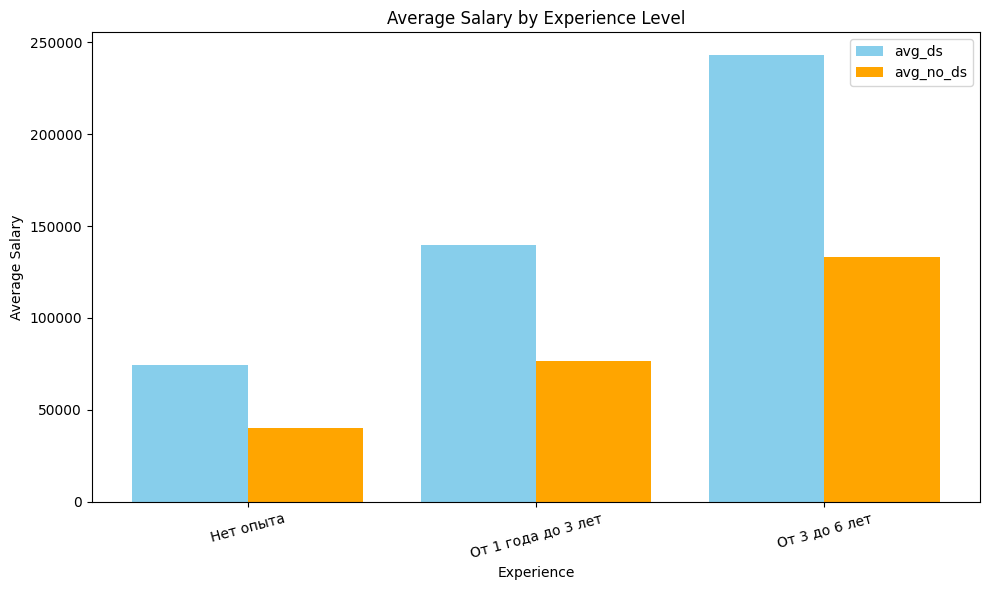

In [ ]:
# Устанавливаем ширину группированных столбцов
bar_width = 0.4
x = range(len(df_7_1))

# Создаем фигуру и оси
fig, ax = plt.subplots(figsize=(10, 6))

# Рисуем столбцы для avg_ds и avg_no_ds
ax.bar(x, df_7_1['avg_ds'], width=bar_width, label='avg_ds', color='skyblue')
ax.bar([pos + bar_width for pos in x], df_7_1['avg_no_ds'], width=bar_width, label='avg_no_ds', color='orange')

# Настраиваем оси и метки
ax.set_xlabel('Experience')
ax.set_ylabel('Average Salary')
ax.set_title('Average Salary by Experience Level')
ax.set_xticks([pos + bar_width / 2 for pos in x])
ax.set_xticklabels(df_7_1['experience'], rotation=15)
ax.legend()

plt.tight_layout()
plt.show()

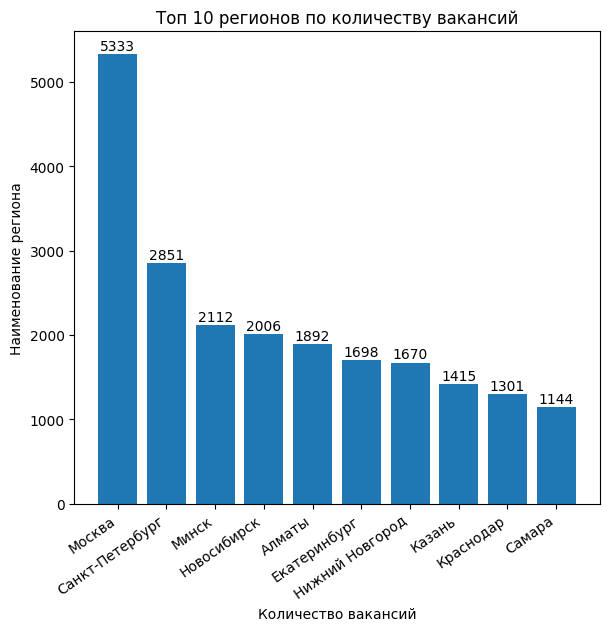

In [ ]:
top_10_cities = '''
SELECT
    COUNT(v.id) AS cnt,
    a.name AS area
FROM vacancies v
JOIN areas a ON v.area_id=a.id
GROUP BY a.name
ORDER BY cnt DESC
LIMIT 10
'''

df = pd.read_sql_query(top_10_cities, connection)

import matplotlib.pyplot as plt
# создадим фигуру и отрисуем график 
fig, ax = plt.subplots(figsize=(6, 6))
ax.bar(x=df.area.values, height=df.cnt.values)

# Добавим подписи данных
for at_x, at_y in enumerate(df.cnt):
    ax.text(at_x, at_y + 50, round(at_y, 1), horizontalalignment='center')

# Повернём подписи столбцов на оси х
plt.xticks(rotation=35, horizontalalignment='right')
plt.tight_layout()

# добавим подписи осей и графика
ax.set(xlabel='Количество вакансий', 
       ylabel='Наименование региона', 
       title='Топ 10 регионов по количеству вакансий',
       );


# выведем на экран результат
fig.show()

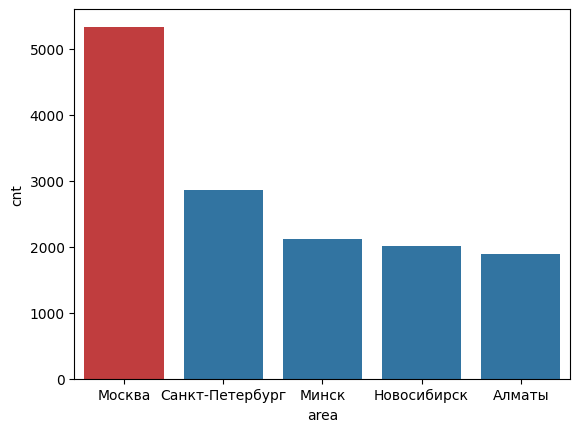

In [ ]:
query_4_1 = f'''
SELECT a.name area, COUNT(v.area_id) cnt
FROM vacancies v JOIN areas a ON v.area_id = a.id
GROUP BY a.id, a.name
ORDER BY 2 DESC
LIMIT 5
'''
df = pd.read_sql_query(query_4_1, connection)

filtred_color = [('tab:red' if x > 3000 else 'tab:blue') for x in df.cnt]
sns.barplot(df, x='area', y='cnt', palette=filtred_color);

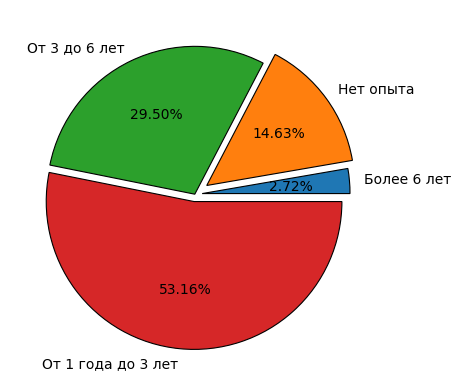

In [ ]:
query_4_5 = f'''
SELECT experience, COUNT(id)
FROM vacancies
GROUP BY 1
ORDER BY 2
'''
df = pd.read_sql_query(query_4_5, connection)

plt.pie(
    df['count'],
    labels = df['experience'].values,
    autopct = '%.2f%%',
    explode = (0.05, 0.1, 0, 0.05),
    wedgeprops = {'lw':0.8,'edgecolor':'k'},   
);

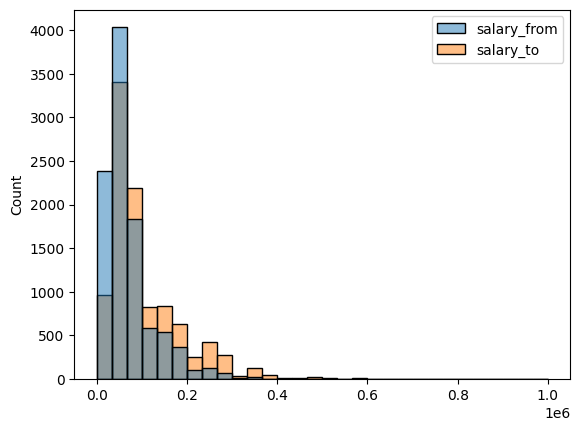

In [ ]:
query_4_3 = f'''
SELECT salary_from as salary_from, salary_to as salary_to
FROM vacancies
'''
df = pd.read_sql_query(query_4_3, connection)
df.dropna(inplace=True)
sns.histplot(data=df, bins=30);

In [ ]:
# в конце работы не забываем закрыть соединение
connection.close()